## <span style = 'color: DodgerBlue'> Bayesian A/B Test

Problem Description: Users are shown either a dummy ad or SmartAd interactive ad. Conduct an A/B Test to determine if the SmartAd increases the likelihood of selecting  yes on a questionaire

In [59]:
import numpy as np
import pandas as pd
from scipy.stats import beta
import matplotlib.pyplot as plt

| Variable Name  | Description  |
|----------------|--------------|
| auction_id     | the unique id of the online user who has been presented the BIO. In standard          terminologies this is called an impression id. The user may see the BIO questionnaire but choose not to respond. In that case both the yes and no columns are zero |   
| experiment     | which group the user belongs to - control or exposed. Control: users who have been shown a dummy ad. Exposed: users who have been shown a creative, an online interactive ad, with the SmartAd brand.   |  
| date  | date in YYYY-MM-DD format  |  
| hour  | hour of the day in HH format  |
| device_make | name of the type of device the user has e.g. Samsung |
| platform_os | id of the OS the user has |
| browser     | name of the browser the user uses to see the BIO questionnaire|
| yes         | 1 if the user chooses the “Yes” radio button for the BIO questionnair|
| no          | summary                                                              |

In [60]:
df = pd.read_csv("C://Users//jrick//Documents//VS Code//Workinprogress//AdSmartABdata - AdSmartABdata.csv")
df.sample(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
1569,340014d5-7517-4793-911f-f50bab340014,control,7/3/2020,15,Generic Smartphone,6,Chrome Mobile,0,0
4761,97debbf3-db24-45e8-a0f7-76816b03030b,exposed,7/4/2020,4,iPhone,5,Mobile Safari,0,0
6868,da204af8-c0b6-46aa-b114-e86c814b2d12,exposed,7/9/2020,23,Generic Smartphone,6,Chrome Mobile,0,0
7975,fc3f29c6-5204-4cf2-b418-608ff0ab1282,control,7/10/2020,12,Samsung SM-A520F,6,Chrome Mobile WebView,0,1
4565,91713b55-9066-4861-b290-7b2174c45bae,exposed,7/5/2020,4,Generic Smartphone,6,Chrome Mobile,0,1


In [61]:
df.shape, df.dtypes  

((8077, 9),
 auction_id     object
 experiment     object
 date           object
 hour            int64
 device_make    object
 platform_os     int64
 browser        object
 yes             int64
 no              int64
 dtype: object)

In [62]:
#Within the data there are instances were a user was shown an ad but did not respond, these are denoted by a 0 in both 'yes' and 'no' coloumns. These instances are removed by creating a dataframe conditional upon there being a 1 in either the yes or no column 

df1 = df[(df['yes'] == 1 ) | (df['no'] == 1)] 
df1.sample(3)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
6225,c5c85ca1-1af4-4384-a625-b91b13825dc8,control,7/3/2020,15,Generic Smartphone,6,Chrome Mobile,0,1
3581,73bc733a-68c4-4d72-9b67-b4ae81e6e2ed,control,7/3/2020,15,Generic Smartphone,6,Chrome Mobile,1,0
7915,fa8ed69f-6b89-47d2-8ece-c5e1f4973207,control,7/4/2020,2,Samsung SM-G930F,6,Facebook,0,1


In [63]:
nulls = df1.isna().sum().sum()     
print(f'There are {nulls} null values')

duplicate = (len(df1['auction_id'])) - df1['auction_id'].nunique()
print(f'There are {duplicate} duplicate values')

There are 0 null values
There are 0 duplicate values


<u>Make It Bayesian</u>: Bayesian methodology requires a prior in order, this typical come some industry standard or user behavior before experiment. For the sake of this excercise we will use the data from the control users from the first month of experiment to create conversation rate and act as if that that prior.

In [64]:
bay = df1[(df1['date'] == '7/3/2020') & (df['experiment'] == 'control')]
bay.sample(3)

C:\Users\jrick\AppData\Local\Temp\ipykernel_34560\2097110060.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bay = df1[(df1['date'] == '7/3/2020') & (df['experiment'] == 'control')]


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
335,0a431ec7-b60a-44a2-8393-529489c6ce7f,control,7/3/2020,15,Generic Smartphone,6,Chrome Mobile,0,1
5966,bd482da7-6a70-4bca-ad47-786562d2d44e,control,7/3/2020,15,Generic Smartphone,6,Chrome Mobile,1,0
7226,e58ffe4a-df41-4b5a-a309-9b8d0ce64976,control,7/3/2020,15,Generic Smartphone,6,Chrome Mobile,0,1


In [65]:
prior=  bay['no'].sum()/bay['no'].count()
prior_success = bay['no'].sum()
prior_failure = bay['no'].count() - bay['no'].sum()

f'Historically the conversion rate is {prior:.0%} based on a data of {prior_success} success and {prior_failure} failures'

'Historically the conversion rate is 55% based on a data of 129 success and 104 failures'


## A/B Test ##

In [66]:
df1.sample(2)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
7286,e74adbd7-5403-45af-90a5-13be805ffbdf,exposed,7/4/2020,15,Generic Smartphone,6,Chrome Mobile,0,1
7322,e82e47bd-cbad-4994-8c80-0b34290db6bd,exposed,7/10/2020,8,Generic Smartphone,6,Chrome Mobile,1,0


In [67]:
control_df = df1[df1['experiment'] == 'control'] #seperate experiment into control and exposed dataframes
exposed_df = df1[df1['experiment'] == 'exposed']


control_conversion_rate = control_df['yes'].sum()/control_df['yes'].count()
exposed_conversion_rate = exposed_df['yes'].sum()/exposed_df['yes'].count()

f'The control conversion rate is {control_conversion_rate:.0%} and the exposed conversion rate is {exposed_conversion_rate:.0%} indicating an increase of {(exposed_conversion_rate) - (control_conversion_rate):.0%}'

'The control conversion rate is 45% and the exposed conversion rate is 47% indicating an increase of 2%'

In [68]:
control_success = control_df['yes'].sum()
control_failure = control_df['yes'].count() - control_success

exposed_success = exposed_df['yes'].sum()
exposed_failure = exposed_df['yes'].count() - exposed_success


control_posterior = beta(prior_success + control_success, prior_failure + control_failure)
exposed_posterior = beta(prior_success + exposed_success, prior_failure + exposed_failure)

In [69]:
control_sample = np.mean(control_posterior.rvs(100)) 
exposed_sample = np.mean(exposed_posterior.rvs(100))

f'Comparision of samples of the control and '

'Comparision of samples of the control and '

## Visualization ##

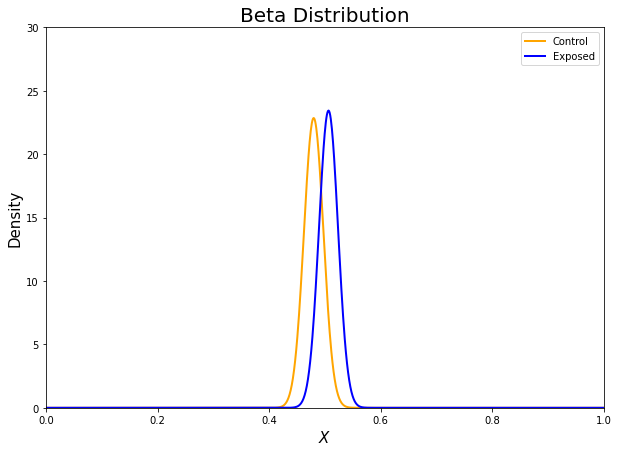

In [70]:

control_alpha = prior_success + control_success
control_beta = prior_failure + control_failure

exposed_alpha = (prior_success + exposed_success)
exposed_beta = (prior_failure + exposed_failure)

alpha_values = [control_alpha, exposed_alpha]
beta_values = [control_beta, control_beta]
linestyles = ['-', '-']
color = ['orange', 'blue']
label = ['Control', 'Exposed']

x = np.linspace(0, 1, 1002) [1:-1]

fig, ax = plt.subplots(figsize = (10, 7))
x = np.linspace(0,1, 1002)[1:-1]

for a, b, ls, c, la in zip(alpha_values, beta_values, linestyles, color, label):
    dist = beta(a, b)

    plt.plot(x, dist.pdf(x), ls=ls, c = c, linewidth= 2 ) #wow lol

plt.xlim(0,  1) 
plt.ylim(0, 30) 

plt.xlabel('$X$', size = 15)
plt.ylabel('Density', size = 15)
plt.title('Beta Distribution', size = 20)


plt.legend( label)
plt.show()



### Monte Carlo ###

In [74]:
probability  = np.mean((control_posterior.rvs(100)) > ((exposed_posterior.rvs(100))))

f'While the exposed group had converstion rate {exposed_conversion_rate:.0%} which was {(exposed_conversion_rate) - (control_conversion_rate):.0%} higher than the {control_conversion_rate:.0%}. We can say that only {probability:.0%} that this due Ad being more effective'

'While the exposed group had converstion rate 47% which was 2% higher than the 45%. We can say that only 32% that this due Ad being more effective'